# Leitura e manipulação de imagens

### Cálculo do histograma de uma imagem

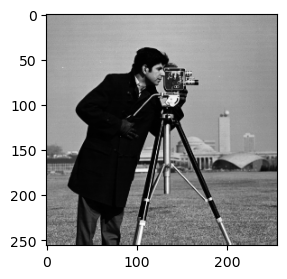

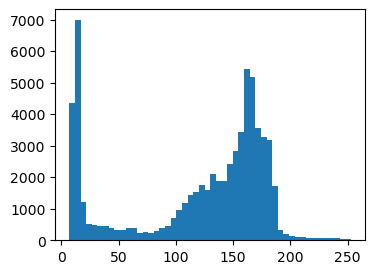

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open('../data/cameraman/cameraman.tiff')
# Conversão da imagem para um array numpy
img = np.array(img)

plt.imshow(img, 'gray')
plt.figure()
# Lembrar de transformar a imagem em um array 1D
_ = plt.hist(img.flatten(), bins=50)

### Aplicação da transformação gamma para tornar a imagem mais escura

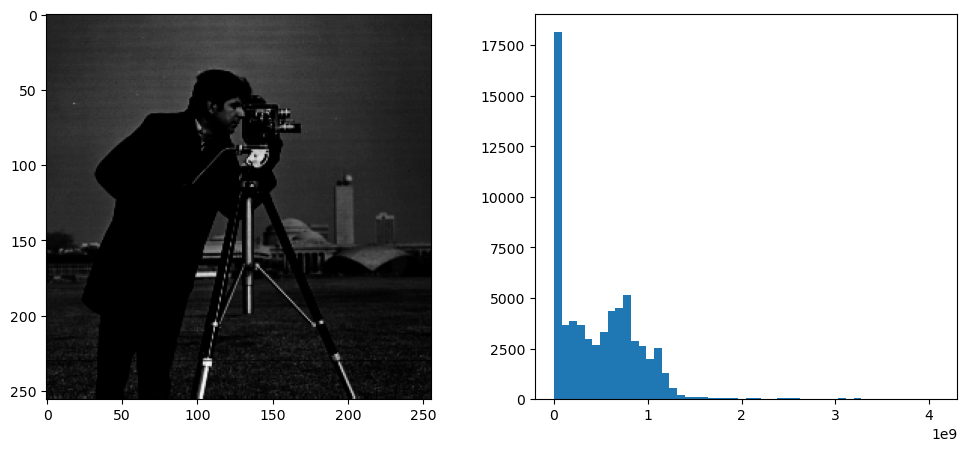

In [23]:
exp = 4.
img_transf = img.astype(float)**exp
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(img_transf, 'gray')
plt.subplot(1, 2, 2)
_=plt.hist(img_transf.flatten(), 50)

Lembrando que a nova imagem possui valores float e não está no intervalo [0, 255]

In [24]:
print(img_transf.dtype, np.min(img_transf), np.max(img_transf))

float64 2401.0 4097152081.0


In [25]:
# Normalização da imagem para o intervalo [0, 255]
img_norm = img_transf - np.min(img_transf)
img_norm = 255*img_norm/np.max(img_norm)
img_norm = img_norm.astype(np.uint8)

print(img_norm.dtype, np.min(img_norm), np.max(img_norm))

uint8 0 255


### Cuidados com formato de imagem

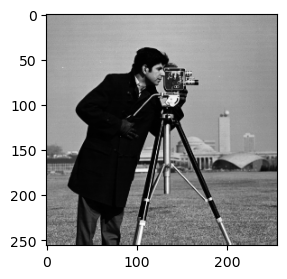

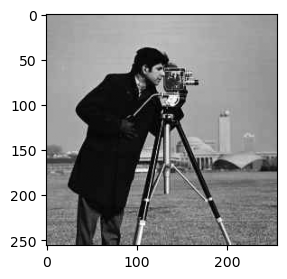

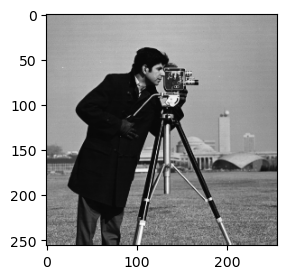

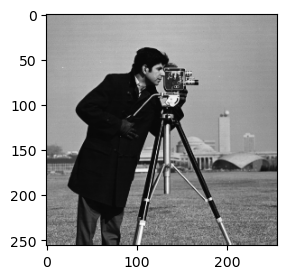

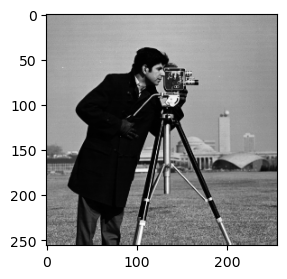

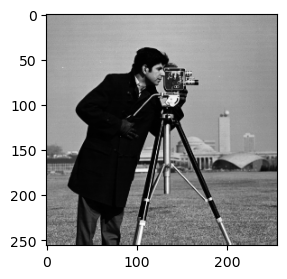

In [26]:
root = '../data/cameraman/'
img_or = Image.open(root+'cameraman.tiff')
img_jpeg = Image.open(root+'cameraman.jpeg')
img2 = Image.open(root+'cameraman2.tiff')
img3 = Image.open(root+'cameraman3.tiff')
img4 = Image.open(root+'cameraman4.tiff')
img_png = plt.imread(root+'cameraman.png')

imgs = [img_or, img_jpeg, img2, img3, img4, img_png]

# Todas as imagens parecem iguais
for img in imgs:
    plt.figure()
    plt.imshow(img, 'gray')

In [27]:
def info(img):
    
    img = np.array(img)
    print('\ndtype:', img.dtype)
    print('shape:', img.shape)
    print('valores:', img.min(), img.max())
    
# Mas as imagens são bem diferentes
for img in imgs:
    info(img)


dtype: uint8
shape: (256, 256)
valores: 7 253

dtype: uint8
shape: (256, 256)
valores: 0 255

dtype: uint8
shape: (256, 256, 3)
valores: 7 253

dtype: uint8
shape: (256, 256, 4)
valores: 7 255

dtype: uint16
shape: (256, 256)
valores: 1799 65021

dtype: float32
shape: (256, 256)
valores: 0.02745098 0.99215686


As imagens são do tipo:

* img_or: uint8 de 1 canal
* img_jpeg: uint8 de 1 canal mas com artefatos de compressão do formato jpeg
* img2: uint8 de 3 canais (RGB)
* img3: uint8 de 4 canais
* img4: uint16 de 1 canal
* img_png: float32 de 1 canal, com valores entre 0 e 1
